# **Exercise 1**

Create the dataset with the next classes

train_images size = (50000, 32, 32, 3)
test_images size = (10000, 32, 32, 3)
train_labels size = (50000, 1)
test_labels size = (10000, 1)


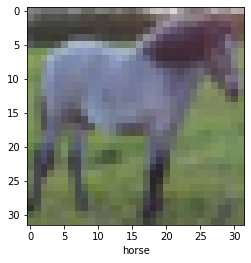

In [ ]:
import keras
from matplotlib import pyplot as plt
import numpy as np
from random import randrange

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
 'dog', 'frog', 'horse', 'ship', 'truck']


print(f"train_images size = {train_images.shape}")
print(f"test_images size = {test_images.shape}")
print(f"train_labels size = {train_labels.shape}")
print(f"test_labels size = {test_labels.shape}")


img_num = randrange(0, 50000)

plt.imshow(train_images[img_num])
plt.xlabel(class_names[train_labels[img_num][0]])
plt.show()


##**Exercise 2**
* Build a model with a CNN of 3 layers and use a maxpooling layer in between each one

In [ ]:
import tensorflow as tf
import keras

model = keras.Sequential()
# Convolutional  
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (32, 32, 3)))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape = (32, 32, 3)))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape = (32, 32, 3)))
## NN
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation= 'relu'))
model.add(keras.layers.Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

## **Exercise 3**
* Train and evaluate the model


In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), metrics=['accuracy'])

history = model.fit(train_images, train_labels,
epochs=10, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images,
test_labels, verbose=2)
print("Accuracy: ",test_acc*100,"%")
print("Loss: ",test_loss*100,"%")

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.7193 - accuracy: 0.3678 - val_loss: 1.4569 - val_accuracy: 0.4866
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1793 - accuracy: 0.5825 - val_loss: 1.0908 - val_accuracy: 0.6141
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0132 - accuracy: 0.6432 - val_loss: 0.9912 - val_accuracy: 0.6594
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9236 - accuracy: 0.6783 - val_loss: 1.0305 - val_accuracy: 0.6364
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8491 - accuracy: 0.7028 - val_loss: 0.9543 - val_accuracy: 0.6700
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7747 - accuracy: 0.7306 - val_loss: 0.9037 - val_accuracy: 0.6908
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7194 - accuracy: 0.7503 - val_loss: 0.9044 -

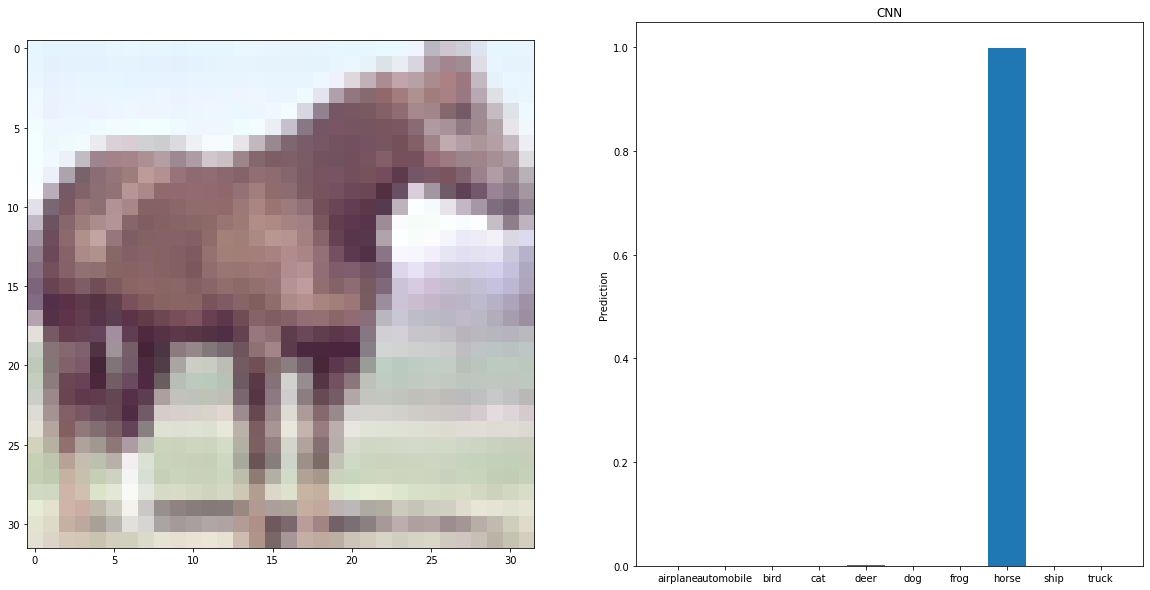

Prediction:  horse
Real:  horse


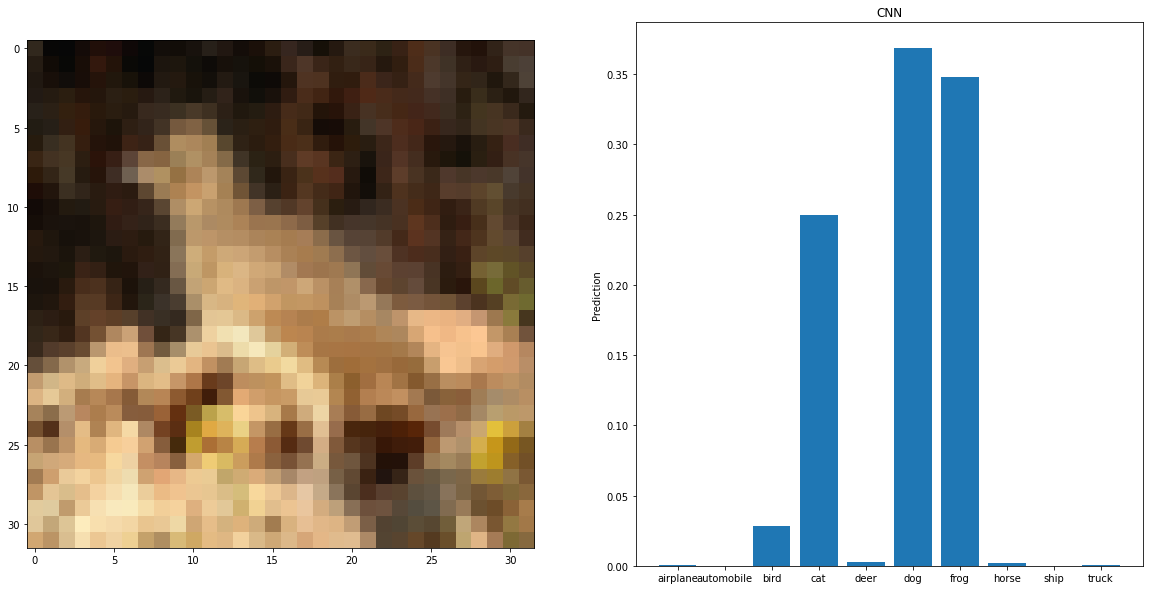

Prediction:  dog
Real:  bird


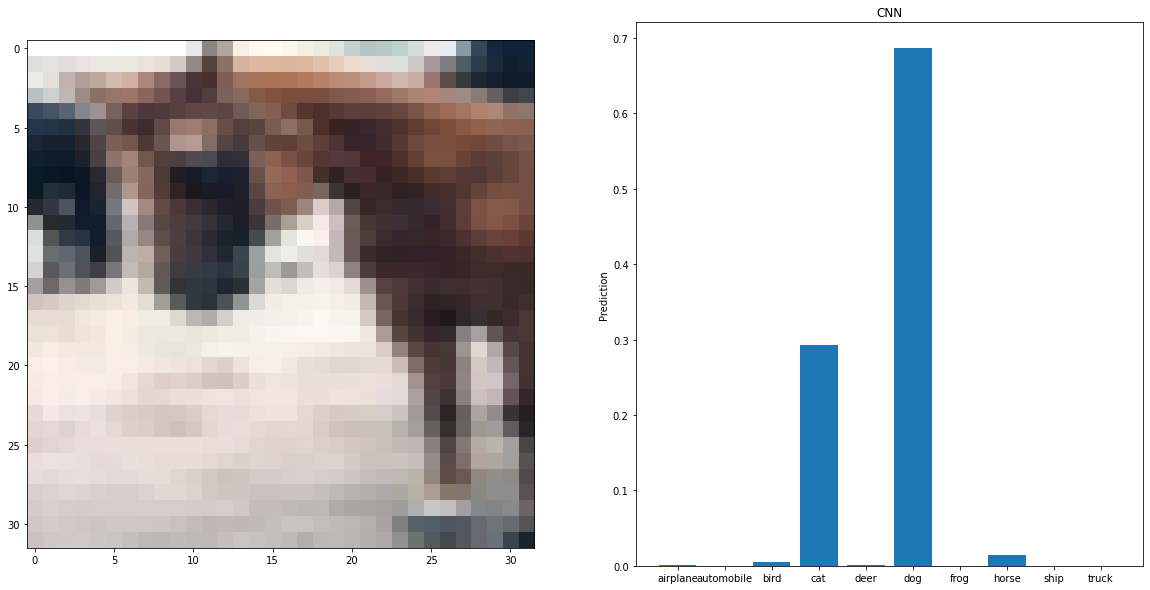

Prediction:  dog
Real:  horse


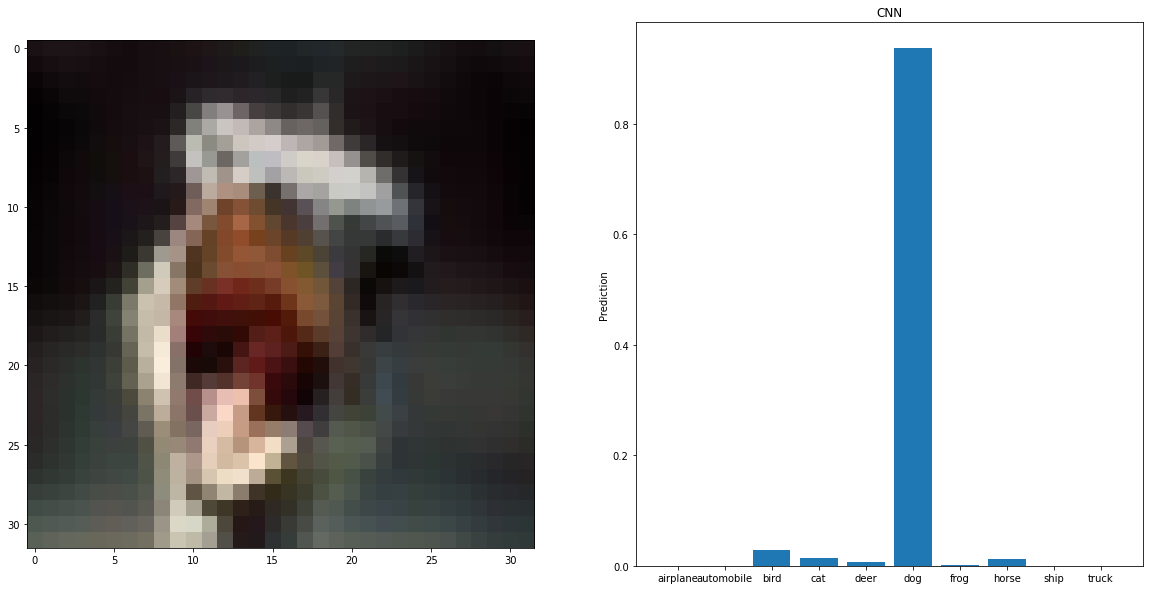

Prediction:  dog
Real:  bird


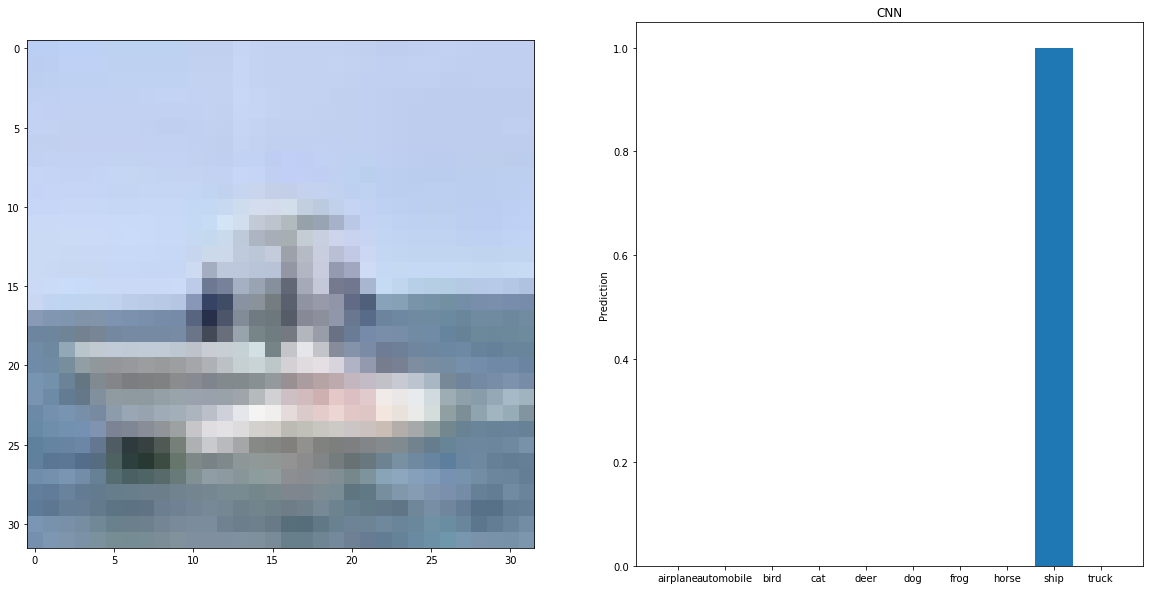

Prediction:  ship
Real:  ship


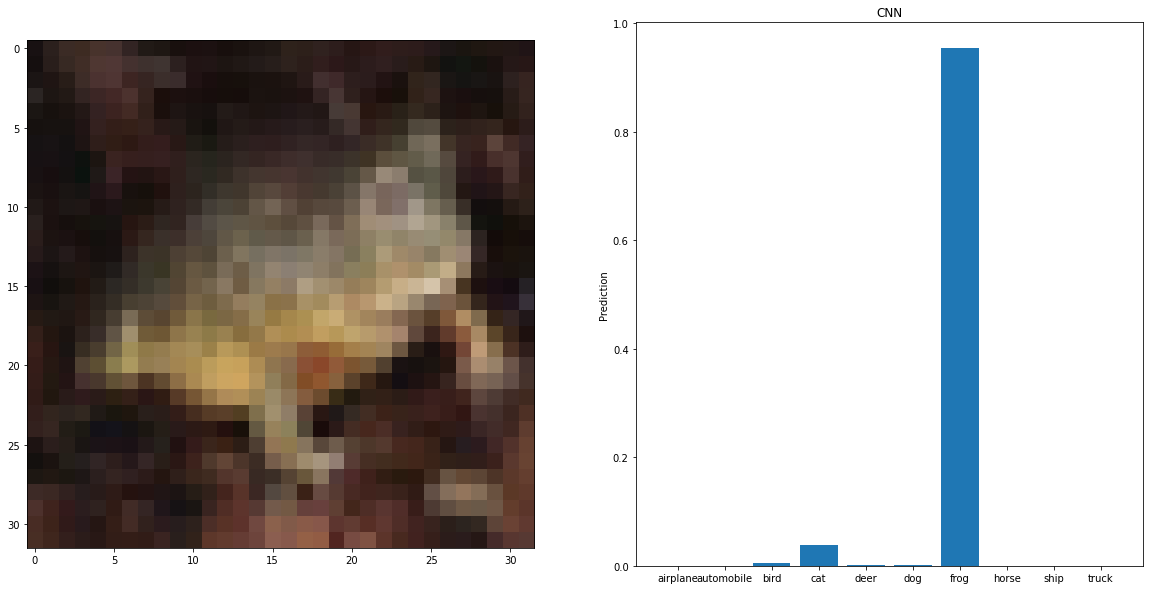

Prediction:  frog
Real:  frog


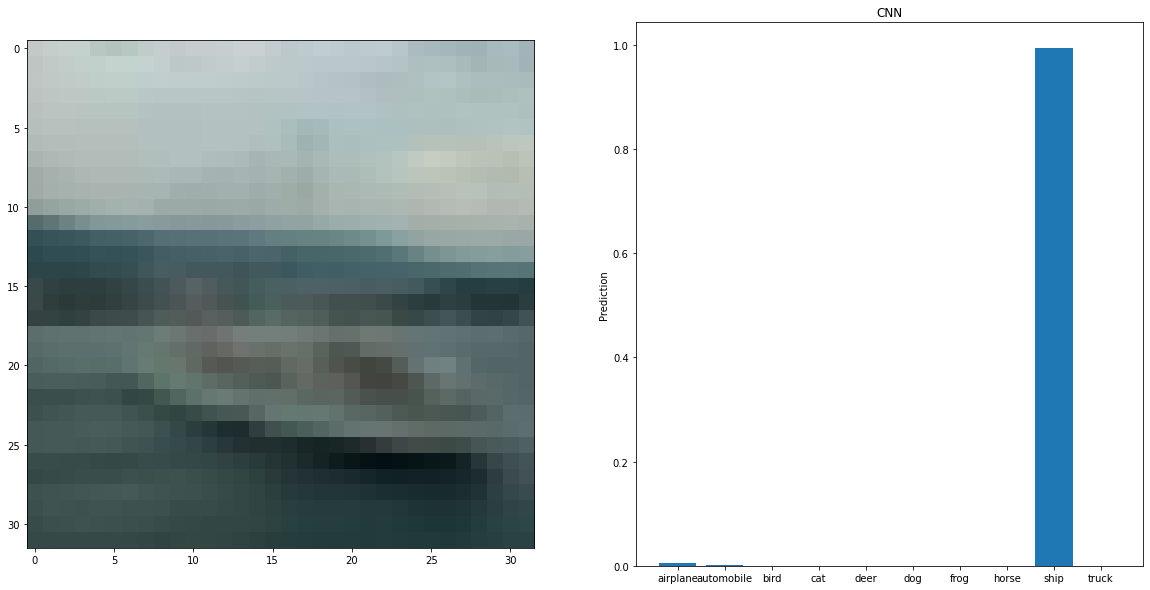

Prediction:  ship
Real:  ship


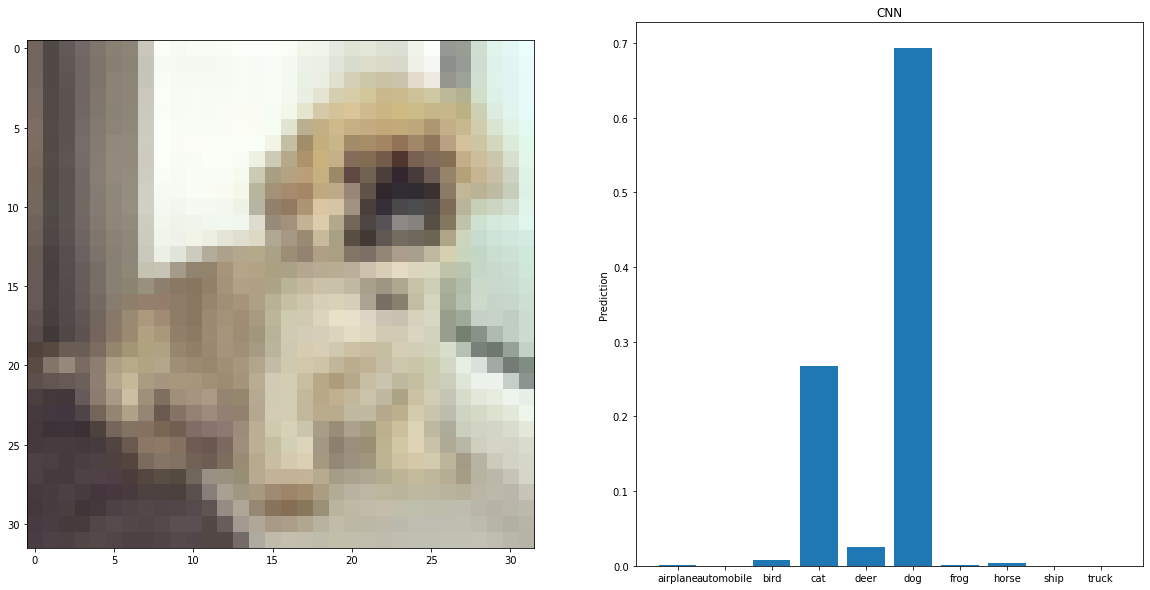

Prediction:  dog
Real:  dog


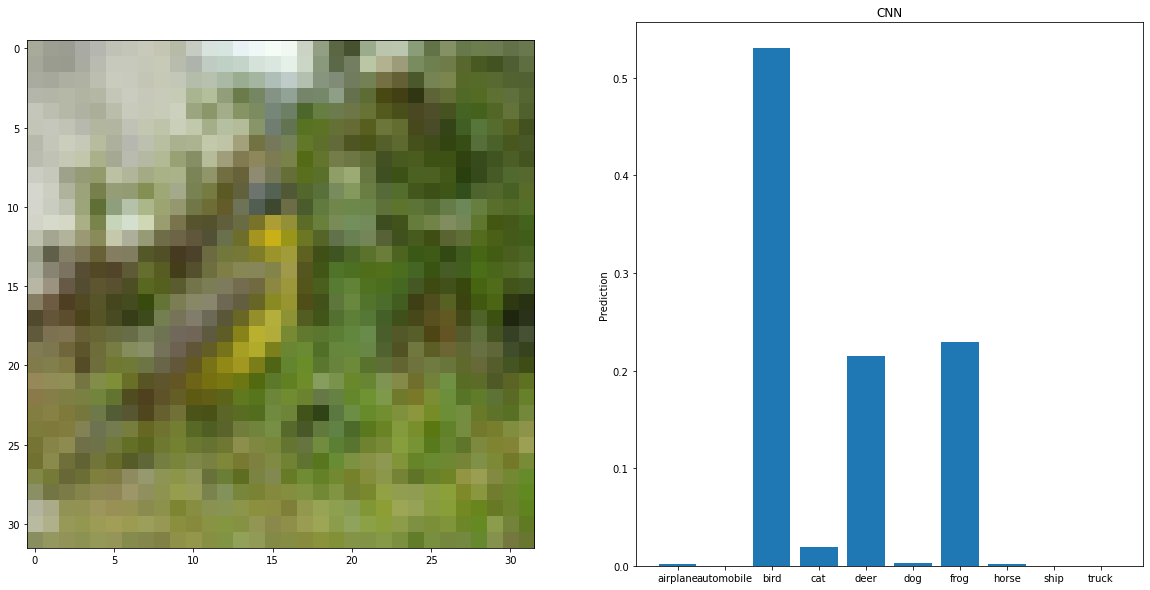

Prediction:  bird
Real:  bird


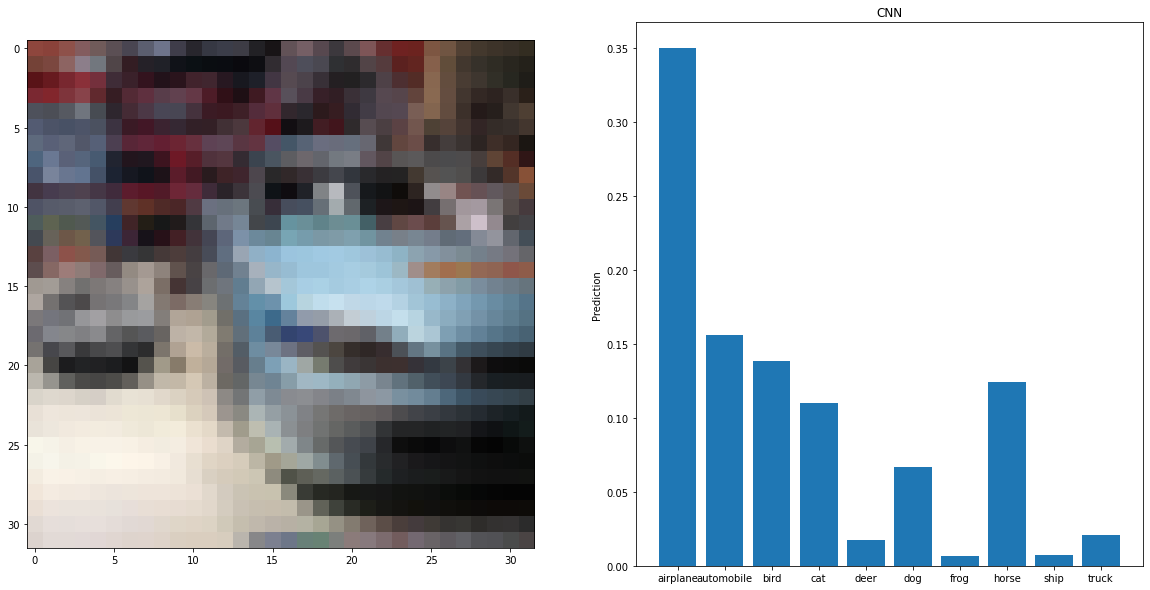

Prediction:  airplane
Real:  automobile


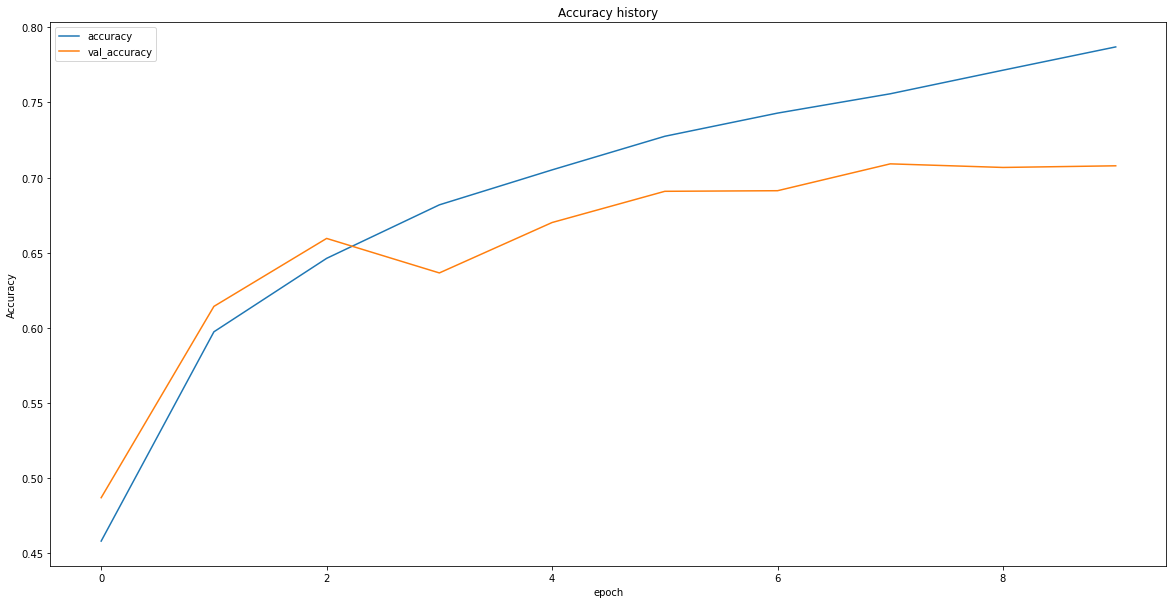

In [ ]:
predictions = model.predict(test_images)
for i in range(10):
  image_num = randrange(0, 10000)
  estimated_label = np.argmax(predictions[image_num])
  plt.figure(figsize=(20,10))
  plt.subplot(1,2,1), plt.imshow(test_images[image_num])
  plt.subplot(1,2,2), plt.bar(class_names, predictions[image_num])
  plt.title('CNN')
  plt.ylabel('Prediction')
  plt.show()
  print("Prediction: ", class_names[estimated_label])
  print("Real: ",  class_names[test_labels[image_num][0]])

# summarize history for accuracy

plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy history')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()